In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_forward2
import seis_test
#plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

Mismatch to hosts: 3.5444538831673834e-05
adjoint 8.673617379884035e-18 4.9042632427835574e-05
diff 1.5727204179012753e-13 1.6588860071825717e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.17634803081803e-13 1.4481413610833205e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!
CPU times: total: 18 s
Wall time: 19.3 s


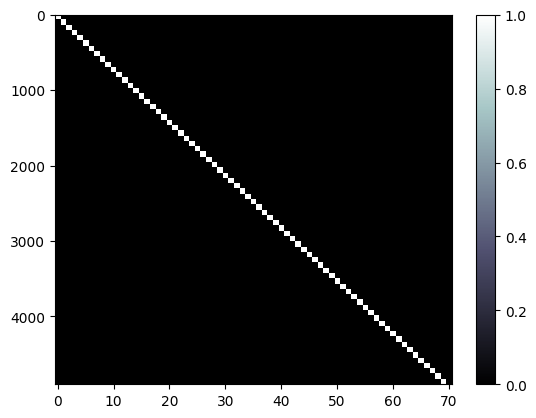

In [2]:
%%time
importlib.reload(kgs)
importlib.reload(seis_test)
importlib.reload(seis_forward2)
seis_test.run_all_tests(test_reference_mode=True)


In [24]:
import cupy as cp
import time
importlib.reload(seis_forward2)

d = kgs.load_all_train_data()[0]
d.load_to_memory()    
vec = d.velocity.to_vector()
d2 = kgs.load_all_train_data()[1]
d2.load_to_memory()    
vec2 = d2.velocity.to_vector()

kgs.profiling=False
seis_forward2.profiling=True
result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec)#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
result2, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec2)
seis_forward2.reset_profile()
t=time.time()
for ii in range(50):
    result, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec)#, vec_adjoint = cp.zeros((5*999*70,1), dtype=kgs.base_type_gpu))
    result2, result_diff, result_adjoint = seis_forward2.vel_to_seis(vec2)
print(kgs.rms(result - d.seismogram.to_vector()))
print(kgs.rms(result2 - d2.seismogram.to_vector()))
print(time.time()-t)
seis_forward2.show_profile()

CompileException: C:\Users\jeroe\AppData\Local\Temp\tmphu3q3eyu\2e3ba52c8d657446cc31b62f7f4b834c28711f7a.cubin.cu(48): error: type name is not allowed
               + pout1[int idx_xm2]
                       ^

C:\Users\jeroe\AppData\Local\Temp\tmphu3q3eyu\2e3ba52c8d657446cc31b62f7f4b834c28711f7a.cubin.cu(48): error: expected a "]"
               + pout1[int idx_xm2]
                           ^

C:\Users\jeroe\AppData\Local\Temp\tmphu3q3eyu\2e3ba52c8d657446cc31b62f7f4b834c28711f7a.cubin.cu(36): warning #177-D: variable "idx_xm2" was declared but never referenced
      int idx_xm2 = (ix >= 2)        ? (idx - 2)                : (row_start + ((ix - 2 + nx) % nx));
          ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

2 errors detected in the compilation of "C:\Users\jeroe\AppData\Local\Temp\tmphu3q3eyu\2e3ba52c8d657446cc31b62f7f4b834c28711f7a.cubin.cu".


In [17]:
import os
print(os.getpid())

17980


In [ ]:
ncu --section source --metrics sm_efficiency,achieved_occupancy,global_load_throughput,global_store_throughput --target-processes all  --target-pid 17980